In [ ]:
# To install basic/necessary libraries
pip install pandas numpy matplotlib seaborn scikit-learn

In [12]:
# Import necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import seaborn as sns #  import the seaborn library into python
import plotly.express as px 
import matplotlib.pyplot as plt #matplotlib library in python


from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# load the dataset
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [19]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')

In [20]:
# statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [7]:
df.info() # dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [10]:
# Missing value
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

<Axes: >

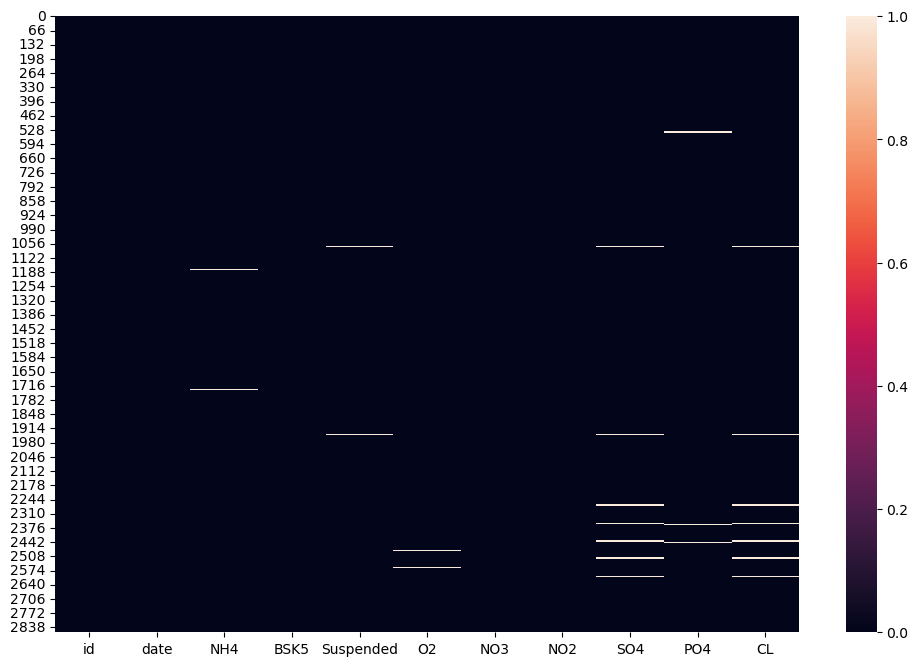

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

<Axes: >

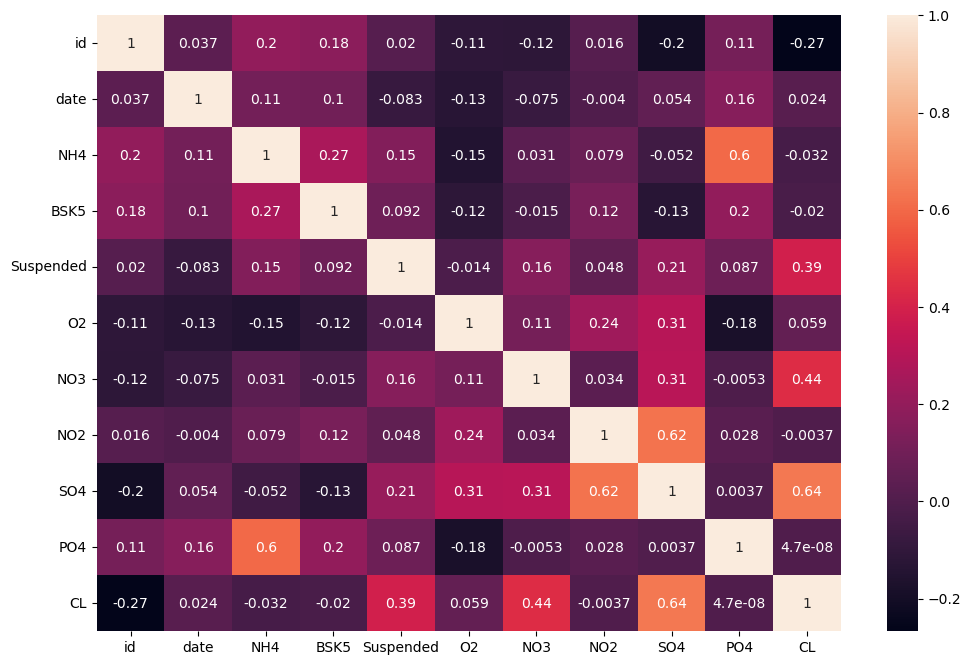

In [31]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

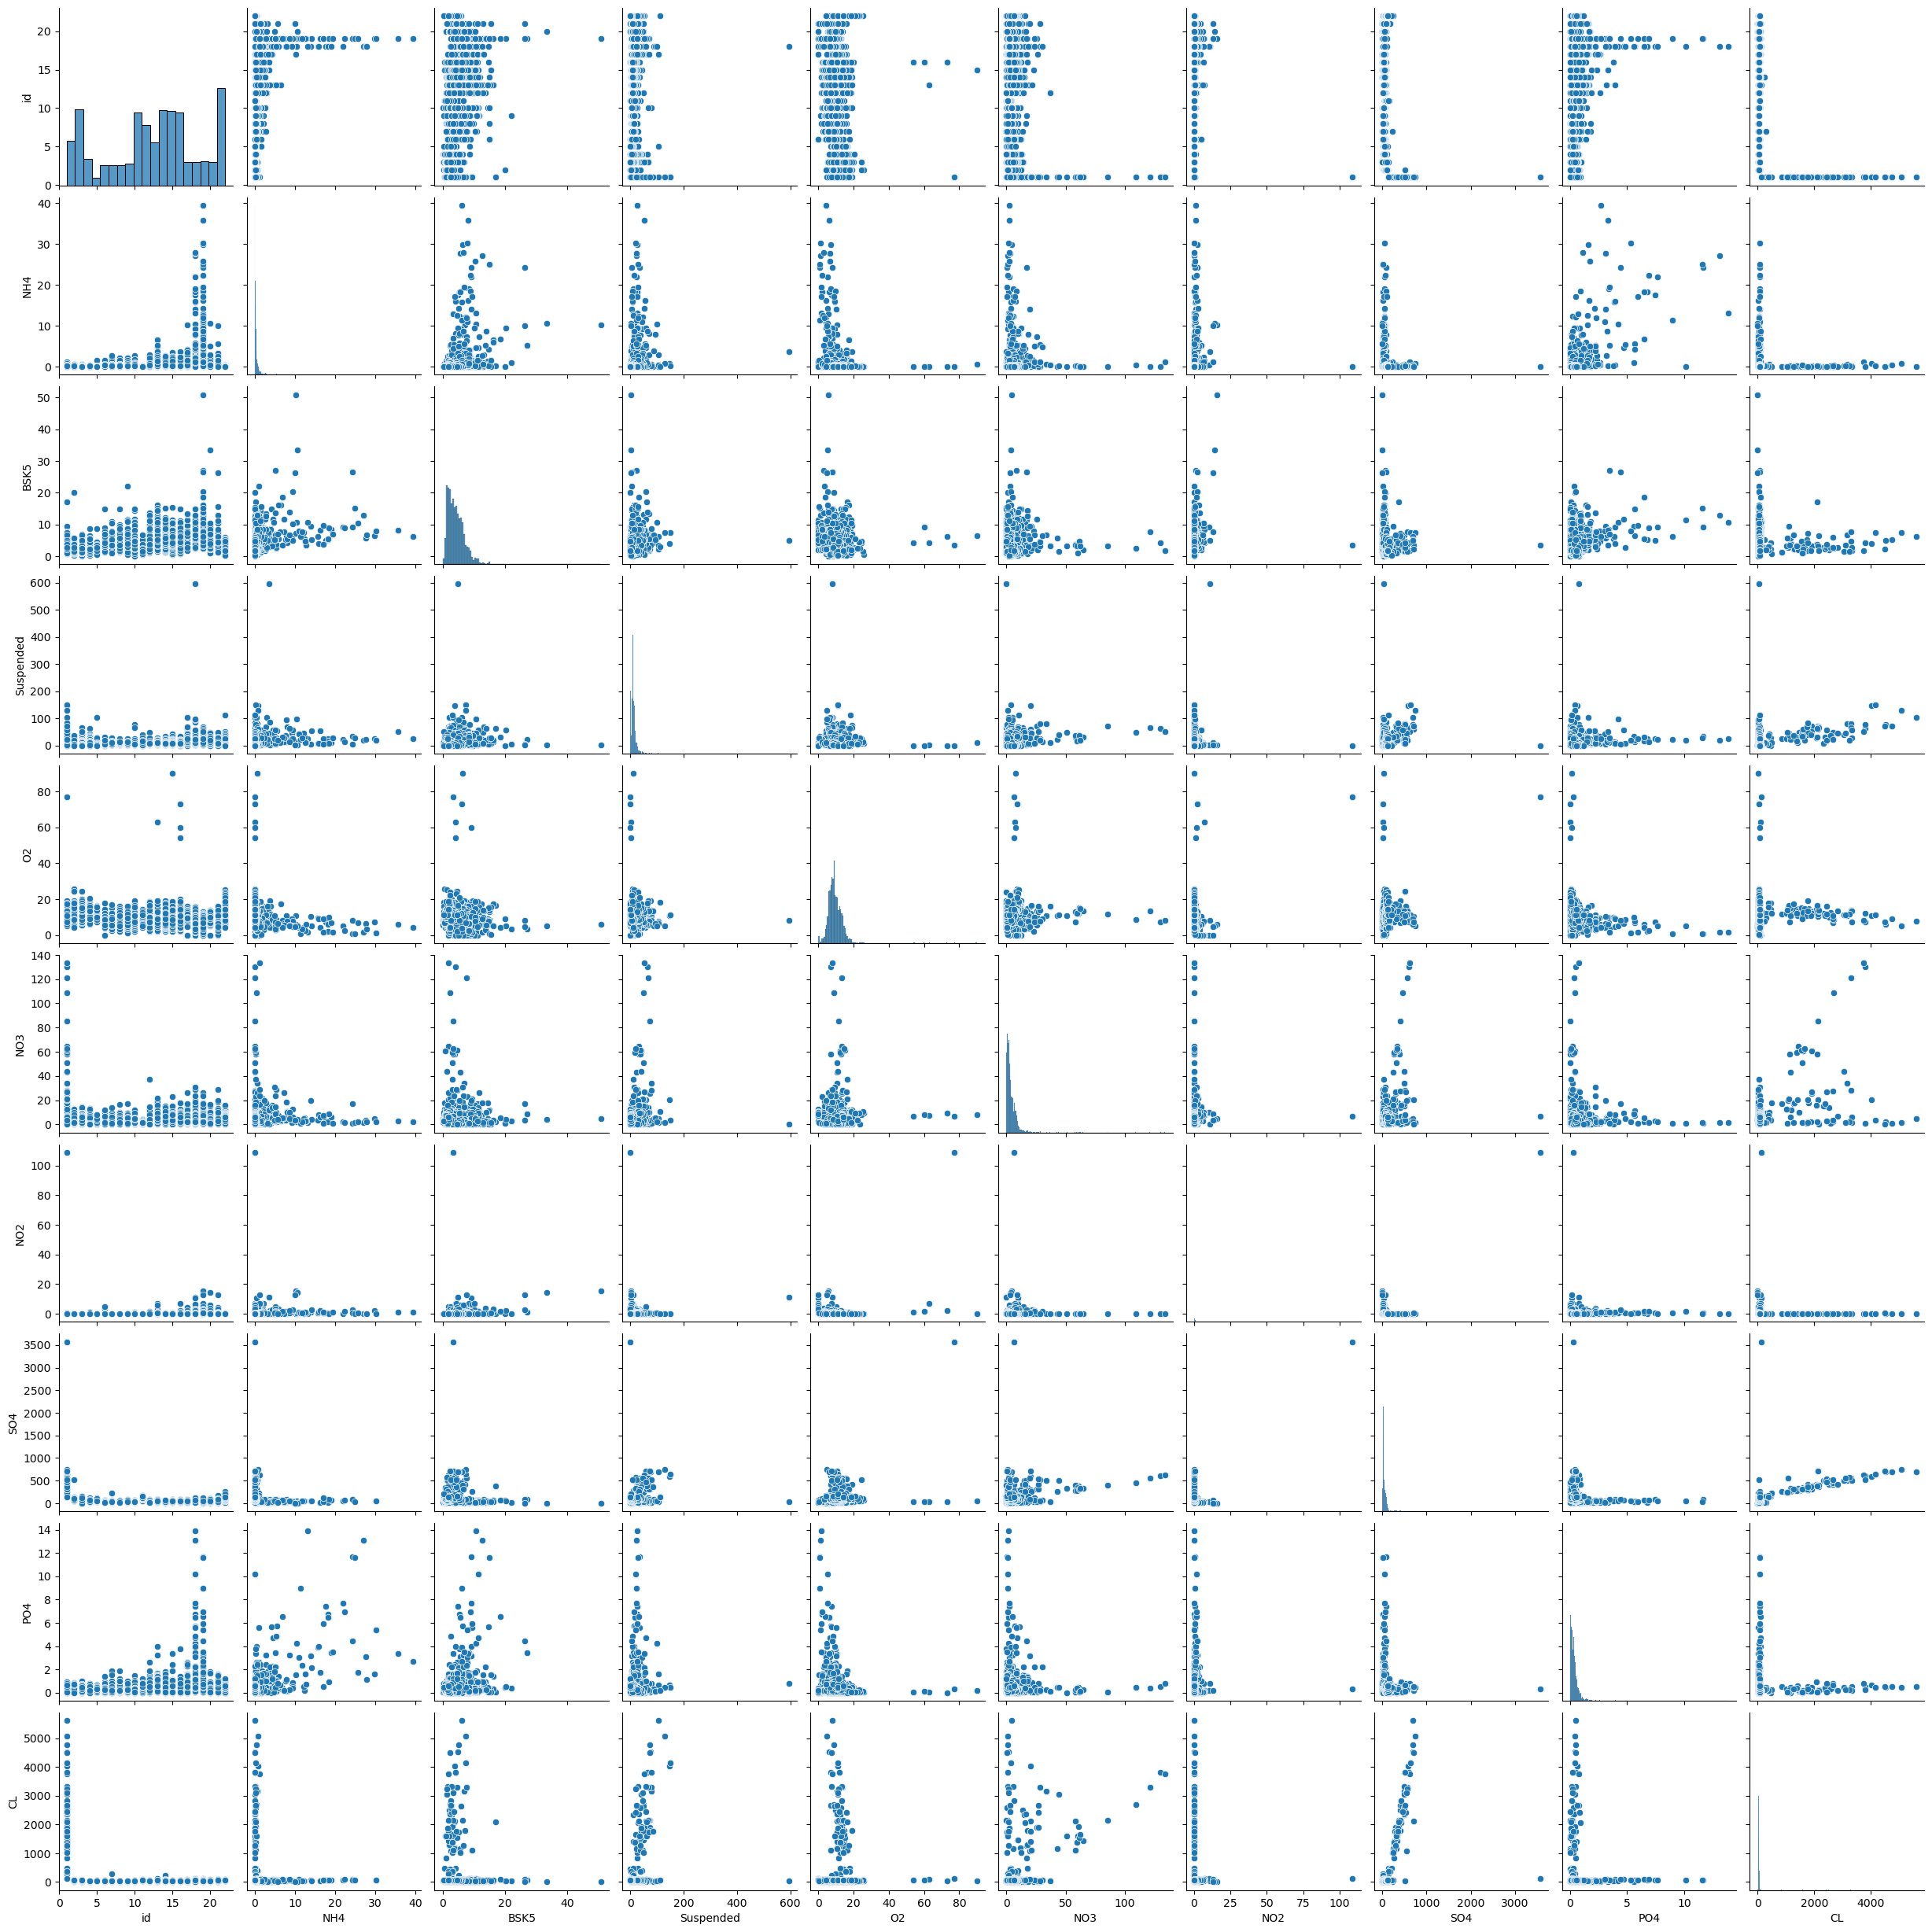

In [41]:
sns.pairplot(df)

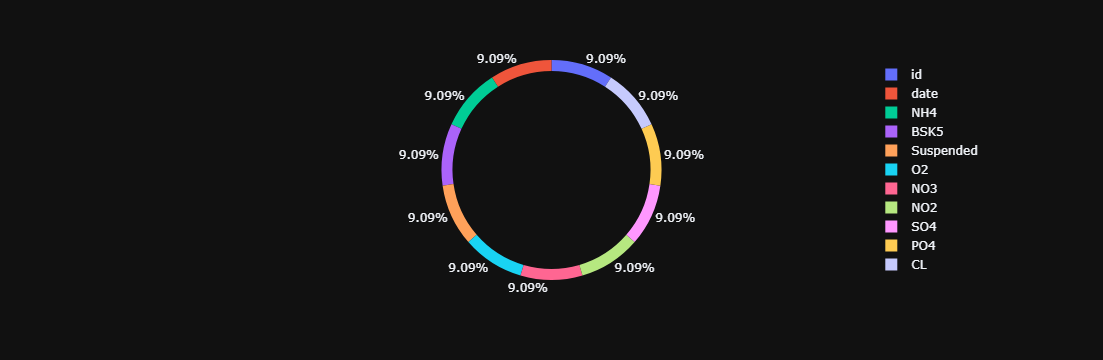

In [24]:
fig = px.pie(df,names = ['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL'],hole = 0.9,template ="plotly_dark")
fig.show()

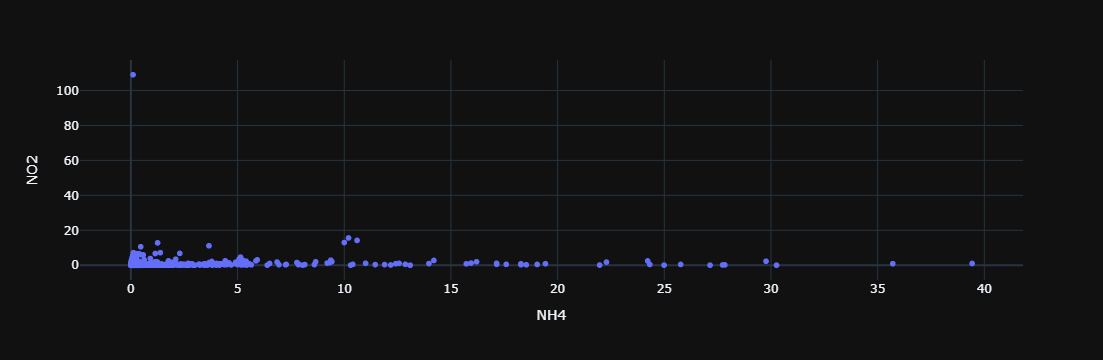

In [27]:
fig = px.scatter(df,x = "NH4",y="NO2",template= "plotly_dark")
fig.show()

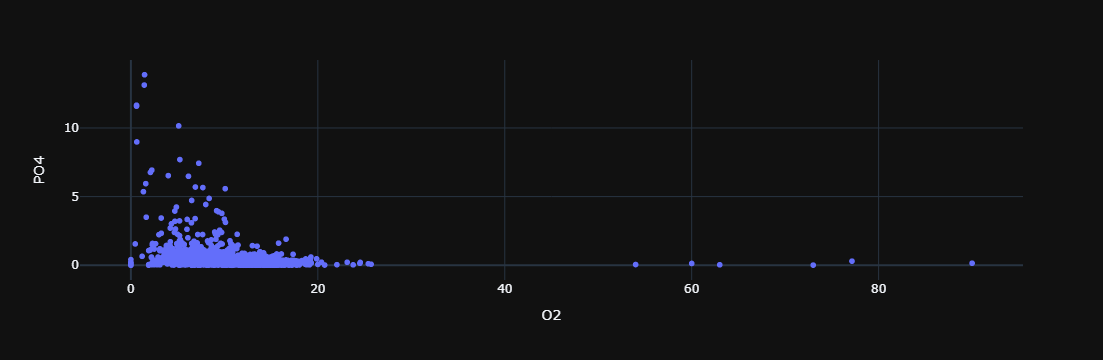

In [31]:
fig = px.scatter(df,x = "O2",y="PO4",template= "plotly_dark")
fig.show()

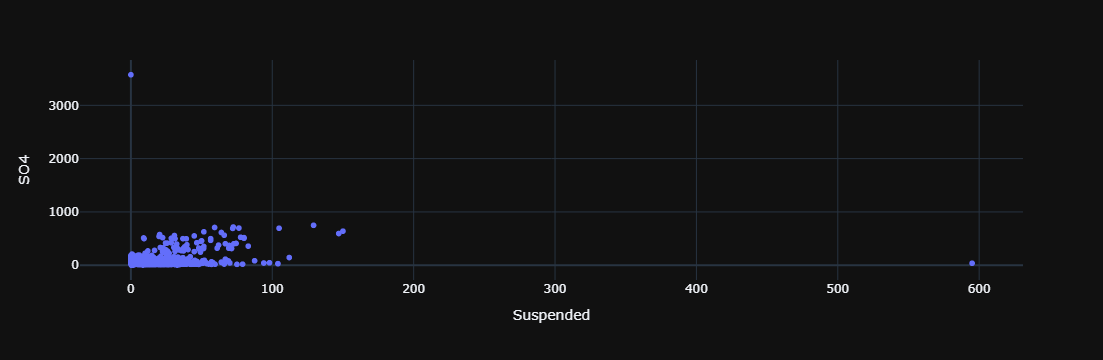

In [35]:
fig = px.scatter(df,x = "Suspended",y="SO4", template= "plotly_dark")
fig.show()

Text(0, 0.5, 'percentage of missing values')

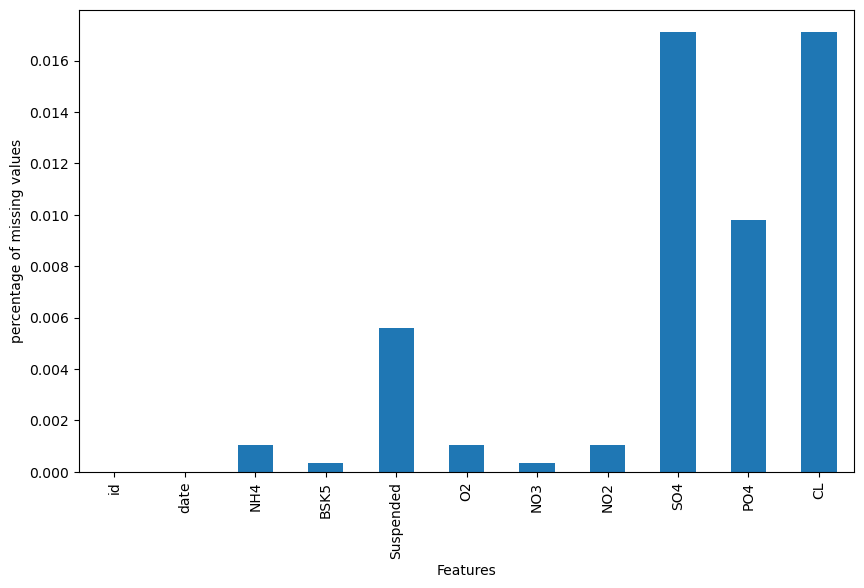

In [38]:
df.isnull().mean().plot.bar(figsize = (10,6))
plt.xlabel("Features")
plt.ylabel("percentage of missing values")

In [41]:

df["NH4"] = df["NH4"].fillna(df["NH4"].mean())
df["BSK5"] = df["BSK5"].fillna(df["BSK5"].mean())
df["Suspended"] = df["Suspended"].fillna(df["Suspended"].mean())
df["O2"] = df["O2"].fillna(df["O2"].mean())
df["NO3"] = df["NO3"].fillna(df["NO3"].mean())
df["NO2"] = df["NO2"].fillna(df["NO2"].mean())
df["SO4"] = df["SO4"].fillna(df["SO4"].mean())
df["PO4"] = df["PO4"].fillna(df["PO4"].mean())
df["CL"] = df["CL"].fillna(df["CL"].mean())


In [42]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64

<Axes: >

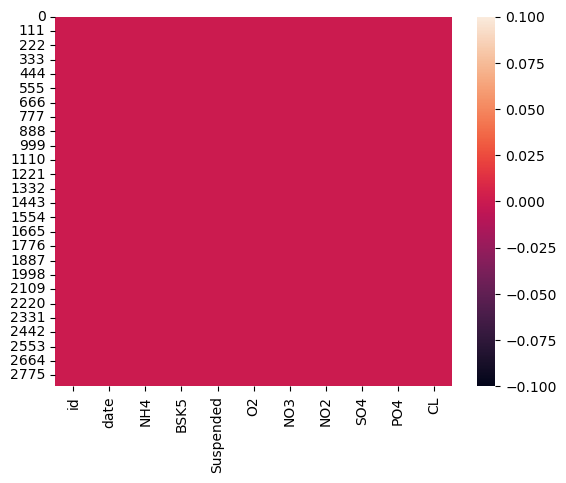

In [43]:
sns.heatmap(df.isnull())